In [ ]:
import pandas as pd
from jiwer import wer

from utils.names import get_file_names, get_model_names

files = get_file_names()
models = get_model_names()

# WER Analysis

In [33]:
from metrics_utils import normalize_text

def get_standard_wer(reference: str, hypothesis: str):
    r = normalize_text(reference)
    h = normalize_text(hypothesis)

    score = wer(r,h)

    return score

In [34]:
wer_results = pd.DataFrame(index=files, columns=models)

for model in models:
    for file in files:
        with open(f"../data/text/{file}.txt", "r", encoding="utf-8") as f:
            gt = f.read()
        with open(f"../data/{model}/text/{file}.txt", "r", encoding="utf-8") as f:
            hyp = f.read()
        
        score = round(get_standard_wer(gt, hyp),3)
        wer_results.loc[file, model] = score

In [35]:
wer_results = wer_results.reset_index()

# 2. Splitta la colonna dell'indice in Programma e Data
wer_results[['Programma', 'Data']] = wer_results['index'].str.extract(r'([A-Z_]+)_(\d{2}_\d{2}_\d{2})')

# 3. Aggiungi la colonna tipologia
def get_tipologia(programma):
    if programma in ['MEZZORAINPIU', 'PORTAPORTA']:
        return 'TalkShow'
    elif programma in ['REPORT', 'PRESADIRETTA']:
        return 'Inchiesta'
    elif programma == 'ULISSE':
        return 'Divulgazione'
    else:
        return 'altro'

wer_results['Tipologia'] = wer_results['Programma'].apply(get_tipologia)

In [36]:
wer_results = wer_results.reindex(columns=['Programma','Data','Tipologia','parakeet','whisper_large','whisperx','assemblyai'])

In [ ]:
wer_results.to_csv('raw_results/wer_results.csv', encoding="utf-8")

In [38]:
wer_results.head()

,Programma,Data,Tipologia,parakeet,whisper_large,whisperx,assemblyai
0,MEZZORAINPIU,10_10_21,TalkShow,0.34,0.287,0.315,0.316
1,MEZZORAINPIU,14_03_21,TalkShow,0.264,0.199,0.175,0.181
2,MEZZORAINPIU,23_05_21,TalkShow,0.094,0.127,0.085,0.089
3,MEZZORAINPIU,24_10_21,TalkShow,0.203,0.154,0.172,0.176
4,MEZZORAINPIU,27_03_22,TalkShow,0.278,0.271,0.273,0.275


### Per singola puntata

In [ ]:
import pandas as pd
wer_results = pd.read_csv('raw_results/wer_results.csv')

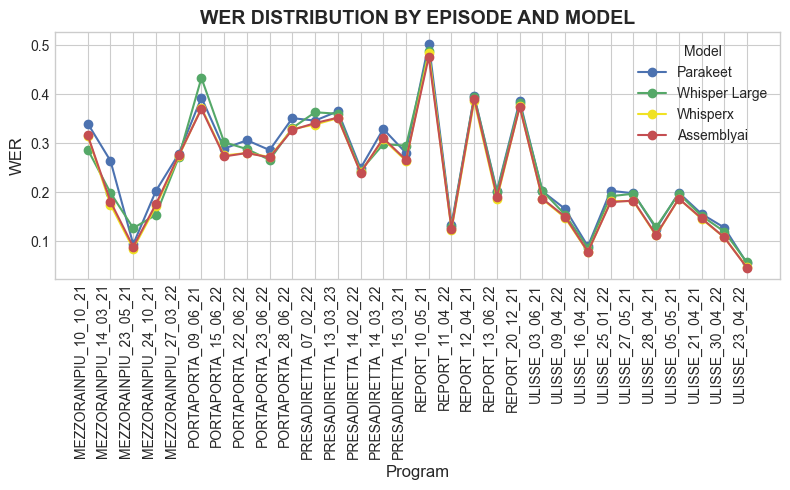

In [4]:
import plot

plot.plot_single_episode(wer_results, models, metric_name="WER")

### Per titolo di programma

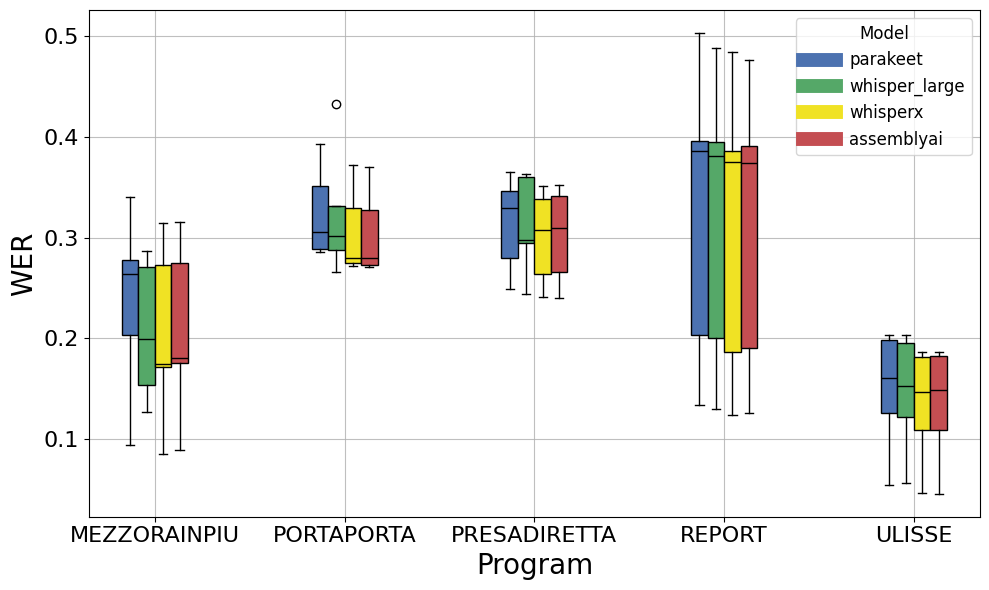

In [ ]:
plot.plot_program(wer_results,"wer",models)

### Per tipologia

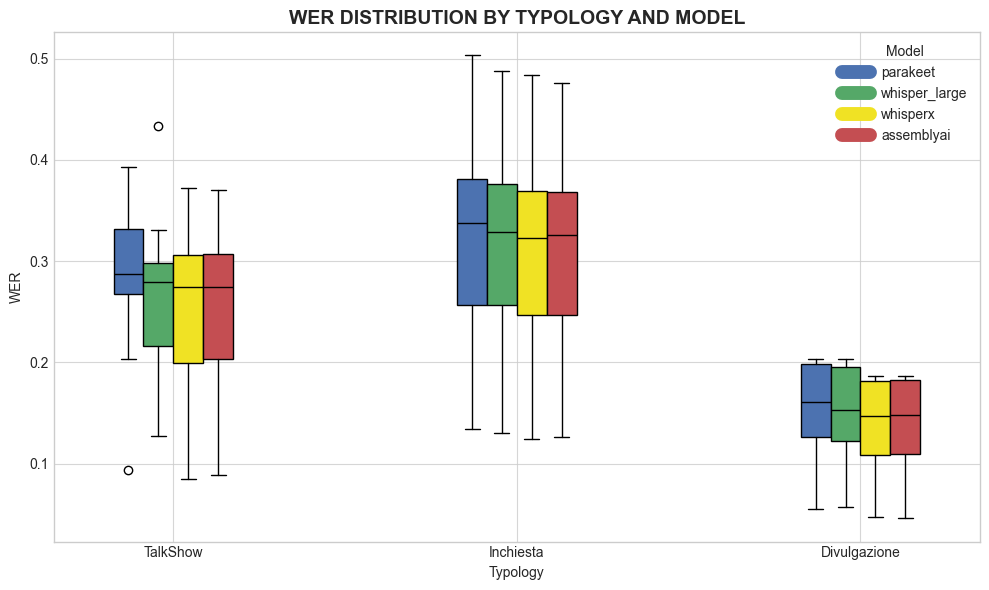

In [6]:
import plot
plot.plot_typology(wer_results, "wer", models)

# SUBER evaluation

See script suber.py

### Per singola puntata

In [ ]:
suber_results = pd.read_csv('raw_results/suber_results.csv')

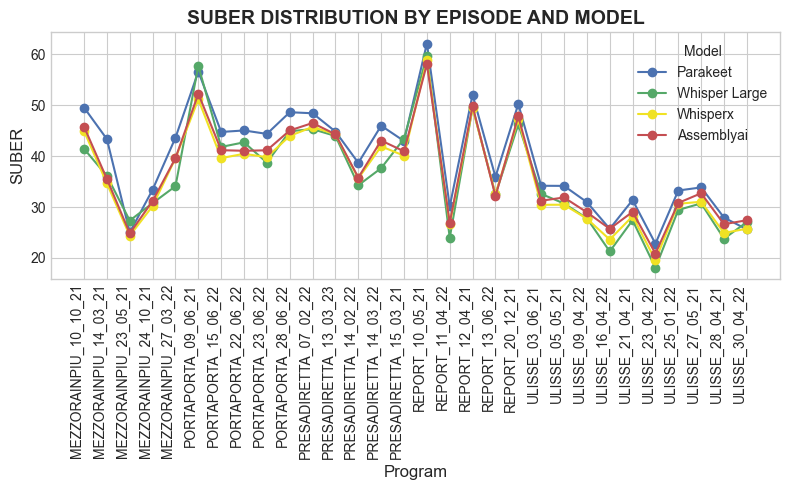

In [13]:
import plot

plot.plot_single_episode(suber_results, models, metric_name="SUBER")

### Per titolo di programma

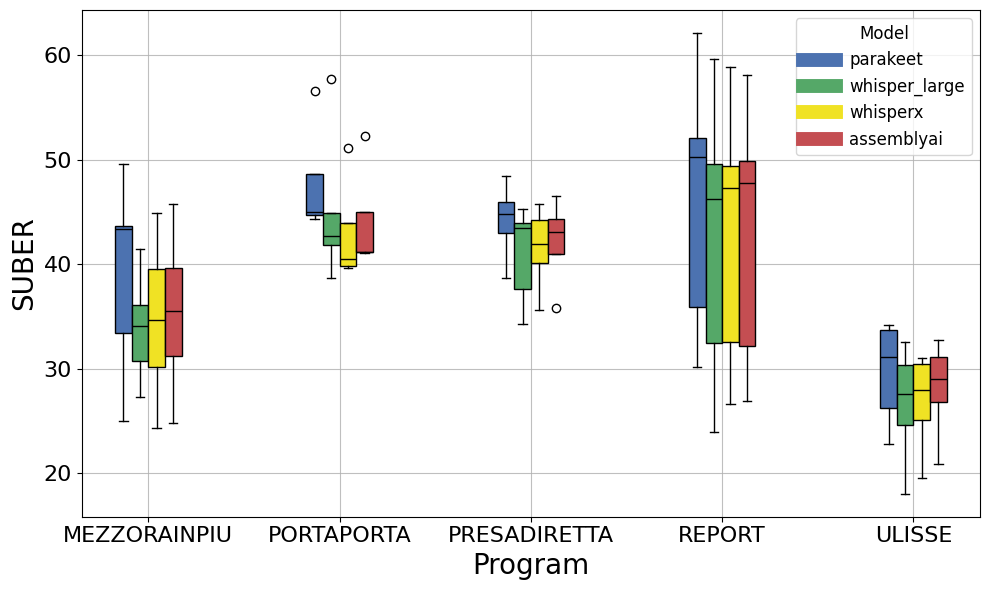

In [3]:
import plot
plot.plot_program(suber_results,"suber",models)

### Per tipologia

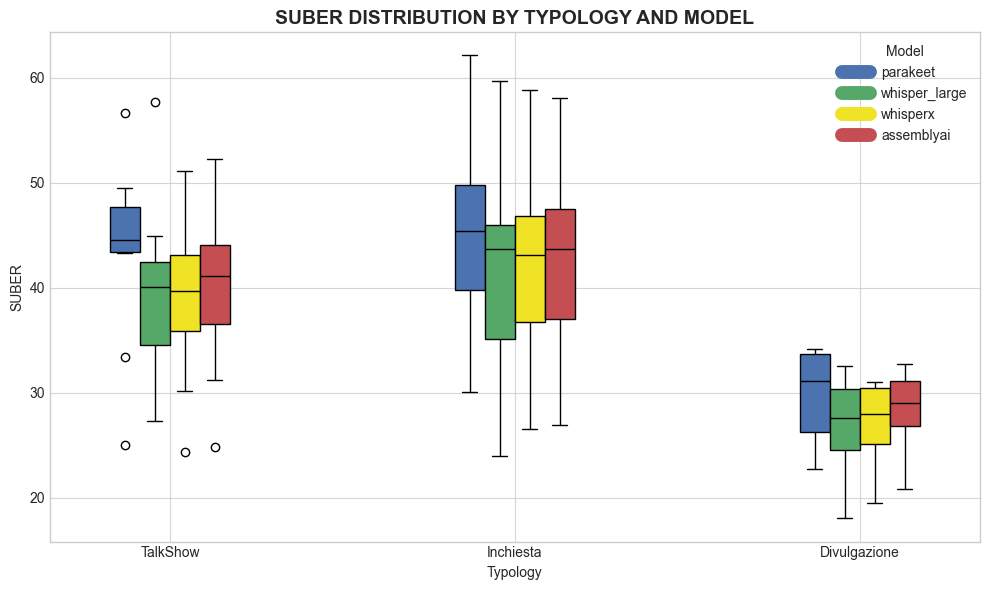

In [15]:
import plot
plot.plot_typology(suber_results, "suber", models)